In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation


# Voor GPU support
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print('TensorFlow {}; Keras {}'.format(tf.__version__, keras.__version__))

TensorFlow 2.18.0; Keras 3.9.0


In [6]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.shape)
dataset_train.head()

(2035, 8)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


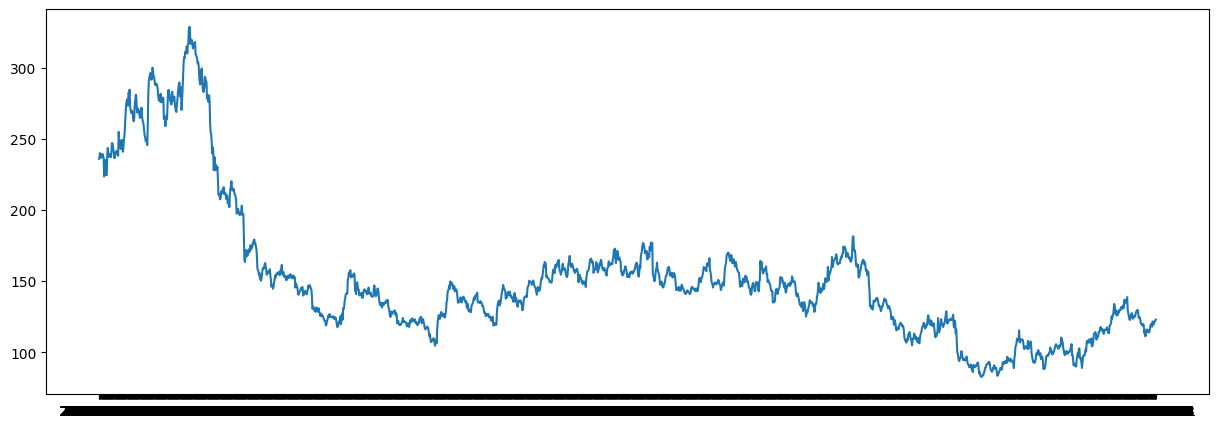

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(dataset_train["Date"], dataset_train["High"])

In [3]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(2035, 1)


In [4]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape)

(1975, 60, 1)


In [5]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 8)

I0000 00:00:1747293342.374436 1213642 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


I0000 00:00:1747293346.568069 1213975 cuda_dnn.cc:529] Loaded cuDNN version 90300


247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0127
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0037
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0025
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0028
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0022
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0017
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0017
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0017
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0015
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0013
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0014
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0017
Epoch 13/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0015
Epoch 14/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0014
Epoch 15/100
247/247 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()